***Heart Disease Prediction Project Using Logistic Regression***

**Project Description**
The aim of this project is to develop a logistic regression model to predict the presence of heart disease in patients based on a set of clinical and demographic features. By analyzing these features, the model will help healthcare professionals in diagnosing heart disease early, enabling timely interventions and potentially saving lives. The project involves preprocessing the data, performing exploratory data analysis, building and tuning the model, and evaluating its performance to ensure accuracy and reliability.

**Dataset Description: heart1.csv**
The heart1.csv dataset contains 13 columns that represent various attributes related to the health of patients. The dataset includes the following features:

**age:** Age of the patient (years).
    
**sex:** Gender of the patient (1 = male, 0 = female).
    
**cp:** Chest pain type (categorical):
        
1: Typical angina.
    
2: Atypical angina.
    
3: Non-anginal pain.
    
4: Asymptomatic.
    
**trestbps:** Resting blood pressure (mm Hg) at the time of hospital admission.
    
**chol:** Serum cholesterol level (mg/dl).
    
**fbs:** Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).
    
**restecg:** Resting electrocardiographic results (categorical):
        
0: Normal.
    
1: Having ST-T wave abnormality.
    
2: Showing probable or definite left ventricular hypertrophy.
    
**thalach:** Maximum heart rate achieved.
    
**exang:** Exercise-induced angina (1 = yes, 0 = no).
    
**oldpeak:** ST depression induced by exercise relative to rest.
    
**slope:** Slope of the peak exercise ST segment (categorical):
        
1: Upsloping.
    
2: Flat.
    
3: Downsloping.
    
**ca:** Number of major vessels (0-3) colored by fluoroscopy.
    
**target:** Target variable indicating heart disease (1 = presence, 0 = absence).


In [3]:
# Importing necessary libraries
import numpy as np               # For numerical computing
import pandas as pd              # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns            # For enhanced data visualization

In [4]:
# Reading the data from a CSV file
dataset = pd.read_csv("heart1.csv")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,0


In [6]:
# Displaying the first five rows of the insurance data
dataset.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1


In [7]:
# Displaying the last few rows of the insurance data
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,0


In [8]:
# Retrieving the column names of the  dataset
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'target'],
      dtype='object')

In [9]:
# Retrieving the dimensions of the  data (number of rows and columns)
dataset.shape

(303, 13)

In [10]:
# Displaying concise summary information about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [11]:
# Generating descriptive statistics for the data and transposing the result
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**Exploratory Data Analysis**

In [13]:
# Checking for missing values in the data and summing the null values for each column
dataset.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
target      0
dtype: int64

In [41]:
# Checking for duplicates
dataset.duplicated().sum()

1

In [14]:
# Calculate the percentage distribution of each class in the 'target' column
dataset.target.value_counts(normalize=True)*100

target
1    54.455446
0    45.544554
Name: proportion, dtype: float64

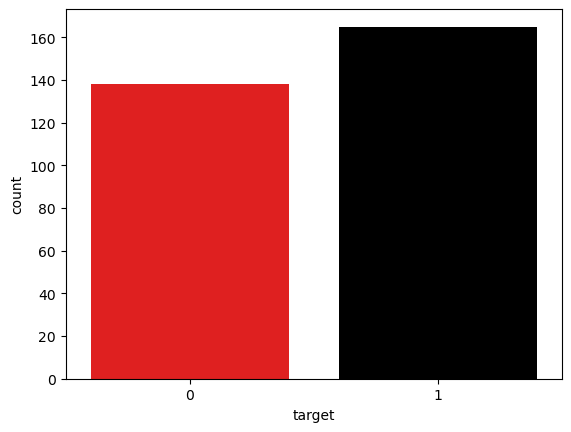

In [15]:
# Visualizing the distribution of heart disease presence (1) and absence (0) using a count plot

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x= 'target',data = dataset,palette=['red','black'])
plt.show()

In [16]:
# Calculate the correlation matrix to measure the linear relationship between variables
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,-0.430696


<Axes: >

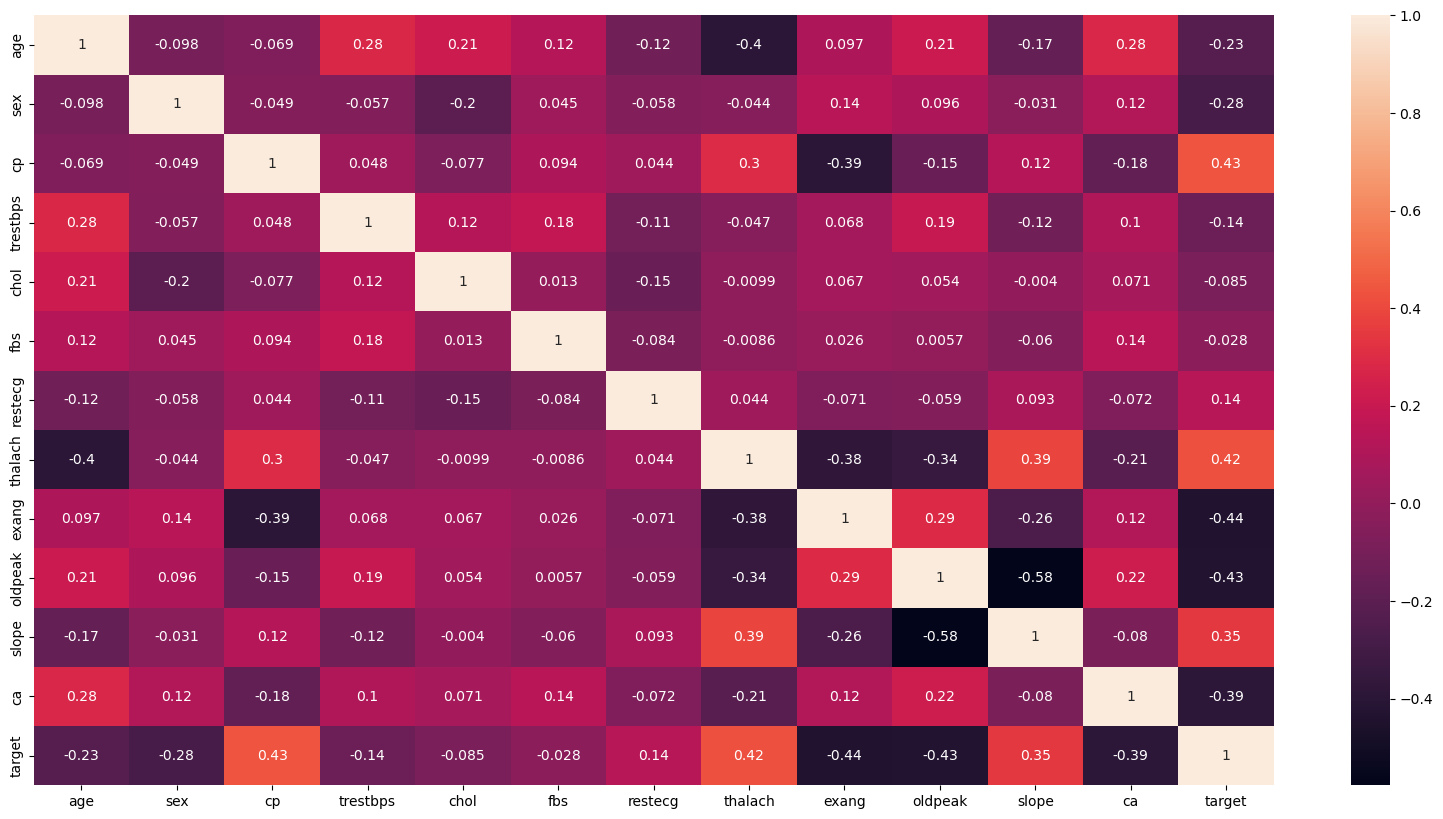

In [18]:
# Create a heatmap to visualize the correlation matrix, displaying correlation coefficients as annotations
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(),annot=True)

**Inferences from the above Heatmap**

**Chest Pain (cp) and Target Relationship:**
There is a strong positive correlation between chest pain type (cp) and the target variable (target) with a value of 0.43. This suggests that chest pain type is an important predictor of the target variable.

**Maximum Heart Rate (thalach) and Exercise Induced Angina (exang):**
There is a notable negative correlation between maximum heart rate achieved (thalach) and exercise induced angina (exang) with a value of -0.39. This implies that individuals with higher maximum heart rates are less likely to experience exercise-induced angina.

**Oldpeak and Slope Relationship:**
There is a significant negative correlation between oldpeak (ST depression induced by exercise relative to rest) and slope (the slope of the peak exercise ST segment) with a value of -0.58. This indicates that higher ST depression is associated with a flatter or downward slope, which is a marker for abnormal heart conditions.



In [19]:
# Calculate the correlation coefficients between the 'target' variable and all other features
dataset.corr()['target']

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
target      1.000000
Name: target, dtype: float64

**Model Building**
-We opt for Logistic Regression due to the categorical nature of the target variable, which suits binary classification tasks like predicting heart disease presence or absence.


In [20]:
# Split the data into features (X) and target (y) label sets
X = pd.DataFrame(dataset.iloc[:,:-1])
y = pd.DataFrame(dataset.iloc[:,-1])

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1


In [23]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [24]:
#Importing train_test_split function
from sklearn.model_selection import train_test_split

# Splitting  the data into Training data() and Testing data 
# We are using 80% of the data for the training and 20% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [25]:
# Trainig data
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
95,53,1,0,142,226,0,0,111,1,0.0,2,0
44,39,1,2,140,321,0,0,182,0,0.0,2,0
257,50,1,0,144,200,0,0,126,1,0.9,1,0
270,46,1,0,120,249,0,0,144,0,0.8,2,0
243,57,1,0,152,274,0,1,88,1,1.2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
161,55,0,1,132,342,0,1,166,0,1.2,2,0
269,56,1,0,130,283,1,0,103,1,1.6,0,0
91,57,1,0,132,207,0,1,168,1,0.0,2,0
80,41,1,2,112,250,0,1,179,0,0.0,2,0


In [26]:
#Testing data
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
207,60,0,0,150,258,0,0,157,0,2.6,1,2
12,49,1,1,130,266,0,1,171,0,0.6,2,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1
297,59,1,0,164,176,1,0,90,0,1.0,1,2
60,71,0,2,110,265,1,0,130,0,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
258,62,0,0,150,244,0,1,154,1,1.4,1,0
240,70,1,2,160,269,0,1,112,1,2.9,1,1
70,54,1,2,120,258,0,0,147,0,0.4,1,0
126,47,1,0,112,204,0,1,143,0,0.1,2,0


In [27]:
# Importing logistic Regression model
from sklearn.linear_model import LogisticRegression


In [28]:
# Creating instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()

# Fitting the training data into the model
logmodel.fit(X_train, y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
#Predicting the test set results
y_pred = logmodel.predict(X_test)

In [30]:
# Predicted values by the model
y_pred

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [31]:
# y_test contains the actual labels for the test data, used to evaluate the model's performance.
y_test

,target
207,0
12,1
282,0
297,0
60,1
...,...
258,0
240,0
70,1
126,1


**Calculating the Accuracy**

In [32]:
# Calculating the training accuracy
print('Accuracy: %d', (logmodel.score(X_train, y_train)))

Accuracy: %d 0.8429752066115702


The training accuracy is approximately 84.30%. This tells us how well the model predicts the correct outcomes on the training data.

In [33]:
# Calculating the testing accuracy
print('Accuracy: %d', (logmodel.score(X_test, y_test)))

Accuracy: %d 0.8360655737704918


The testing accuracy is about 83.61%. This shows how accurately the model predicts outcomes on new, unseen data.

In [34]:
# Evaluating the model performace using confusion Matrix
#Confusion matrix for training data
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, logmodel.predict(X_train))
print(confusion_matrix)

[[ 88  26]
 [ 12 116]]


**In the above Confusion Matrix**:
1.The top-left value (88) represents the count of true negatives (actual negative, predicted negative).
2.The top-right value (26) represents the count of false positives (actual negative, predicted positive).
3.The bottom-left value (12) represents the count of false negatives (actual positive, predicted negative).
4.The bottom-right value (116) represents the count of true positives (actual positive, predicted positive).

With a high number of true positives and true negatives compared to false positives and false negatives, the model seems to be doing a good job on training data. 

In [35]:
# classificaton report of training data
from sklearn.metrics import classification_report
print(classification_report(y_train, logmodel.predict(X_train)))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       114
           1       0.82      0.91      0.86       128

    accuracy                           0.84       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.84      0.84       242



On the training data, the model shows promising performance with good precision, recall, and F1-score for both positive and negative classes, along with an accuracy of 84%.

In [36]:
#Confusion matrix for testing data
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[19  5]
 [ 5 32]]


-True Negatives (TN): 19 (Top left)
-False Positives (FP): 5 (Top right)
-False Negatives (FN): 5 (Bottom left)
-True Positives (TP): 32 (Bottom right)

Overall, the model shows reasonable performance on the testing data, with a higher number of true positives and true negatives compared to false positives and false negatives.

In [37]:
# Classification report of testing data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        24
           1       0.86      0.86      0.86        37

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In summary, the model achieves relatively consistent precision, recall, and F1-score for both classes on the testing data, with an overall accuracy of 84%. This suggests that the model maintains its performance on unseen data.

In [40]:
# Using the trained logistic regression model to predict labels for the test data (X_test)
logmodel.predict(X_test)

# Creating a DataFrame to compare actual and predicted values
y_test['pred'] = logmodel.predict(X_test)

#  Displaying the DataFrame to compare actual and predicted values
y_test.head(30)


,target,pred
207,0,0
12,1,1
282,0,0
297,0,0
60,1,1
102,1,1
183,0,1
136,1,1
271,0,0
39,1,1
